In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_parquet('filtered_base.parquet')


# Ajusto nombres de productos por privavidad de la información
df['Plan_Agrupado'] = df['Plan_Agrupado'].replace(['PUF', 'MetLife Pension','PALP', 'Dotal', 'Variable Life','Life Cover Plus'], ['Universal', 'Pensión','Otro','Otro','Otro','Otro'])

# Creamos variable categorica para graficar
def Cat(days):
  if days <= 0:
    return "a. Al Día"
  elif 0 < days <= 15:
    return "b. 0-15 Días Mora"
  elif 15 < days <= 30:
    return "c. 16-30 Días Mora"
  else:
    return "d. >30 Días Mora"

df['Categoria_Mora'] = df['dias_mora'].apply(Cat)

In [54]:
df.head()

,dias_mora,Estado_Inicial,Plan_Agrupado,Ant_pol,NBS,Huerfano,MedioPago,activos,genero,Edad,Juridico,total_mora,NBS_mORA,Total_Activas,NBS_Vigente,Estado_Final_2_meses_despues,efectivo_disponible,Categoria_Mora
0,17,0,Vida Entera,317,1198163,1,MANUAL,0.0,F,78,0,1,1198163,1,1198163,0,0.0,c. 16-30 Días Mora
1,-22,0,AP,314,364493,1,AUTOMATICO,80000000.0,F,63,0,3,5250399,3,5250399,0,6200000.0,a. Al Día
2,-14,0,AP,299,696918,1,AUTOMATICO,0.0,M,63,0,1,696918,1,662470,0,0.0,a. Al Día
3,0,0,AP,295,695639,0,AUTOMATICO,0.0,F,56,0,1,695639,1,695639,1,0.0,a. Al Día
4,-14,0,AP,295,1391279,1,AUTOMATICO,1000000000.0,M,58,0,6,23168963,7,103481172,0,179569000.0,a. Al Día


In [68]:
#revisión de los datos
df.describe(include='all')


,dias_mora,Estado_Inicial,Plan_Agrupado,Ant_pol,NBS,Huerfano,MedioPago,activos,genero,Edad,Juridico,total_mora,NBS_mORA,Total_Activas,NBS_Vigente,Estado_Final_2_meses_despues,efectivo_disponible,Categoria_Mora
count,80886.0,80886.0,80886,80886.0,80886.0,80886.0,80886,80886.0,80886,80886.0,80886.0,80886.0,80886.0,80886.0,80886.0,80886.000000,80886.0,80886
unique,<NA>,NaN,6,<NA>,<NA>,<NA>,2,<NA>,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,4
top,<NA>,NaN,AP,<NA>,<NA>,<NA>,AUTOMATICO,<NA>,M,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,a. Al Día
freq,<NA>,NaN,33149,<NA>,<NA>,<NA>,76874,<NA>,47298,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,70706
mean,-12.703113,0.0,NaN,64.227926,3287759.245024,0.511794,NaN,3079706807.094479,NaN,46.877296,0.003833,3.055992,9789888.787046,3.100611,10779302.371647,0.045150,96106313.824761,NaN
std,16.155793,0.0,NaN,46.760721,3116135.054533,0.499864,NaN,497356137900.321594,NaN,9.248476,0.061789,2.270711,9541884.495318,2.324179,14732983.652282,0.207634,1060552716.886365,NaN
min,-30.0,0.0,NaN,6.0,0.0,0.0,NaN,0.0,NaN,19.0,0.0,1.0,0.0,1.0,0.0,0.000000,-89880000000.0,NaN
25%,-26.0,0.0,NaN,27.0,824091.0,0.0,NaN,100000000.0,NaN,40.0,0.0,2.0,4839502.5,2.0,4853389.0,0.000000,27000000.0,NaN
50%,-17.0,0.0,NaN,53.0,2348246.0,1.0,NaN,240000000.0,NaN,46.0,0.0,3.0,7120718.5,3.0,7180189.0,0.000000,52937268.0,NaN
75%,-3.0,0.0,NaN,94.0,4957696.0,1.0,NaN,510800750.0,NaN,53.0,0.0,4.0,12325593.25,4.0,12536021.0,0.000000,106460352.0,NaN


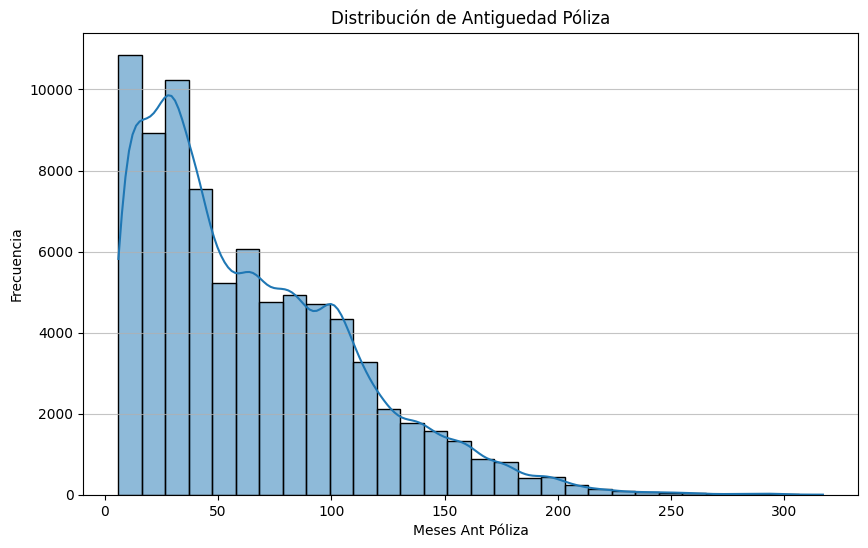

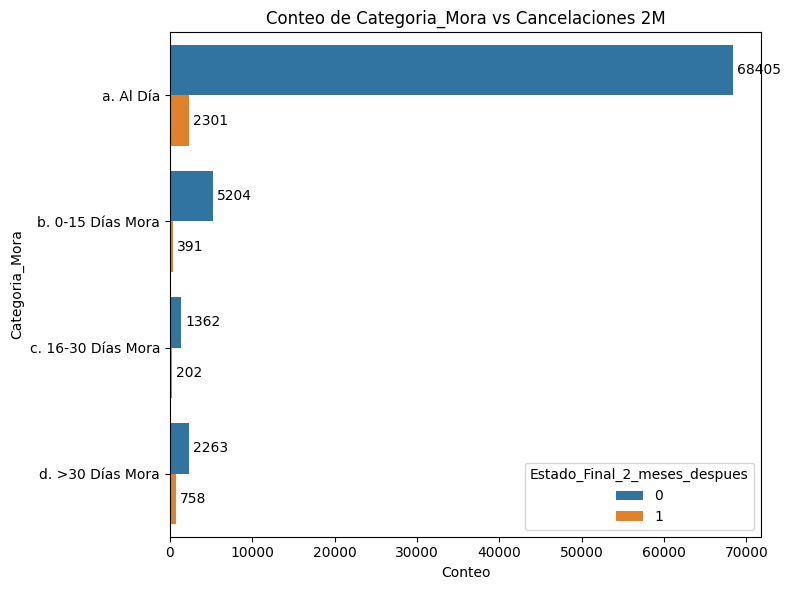

Estado_Final_2_meses_despues      0     1  Total Categoria_Mora    Ratio %
Categoria_Mora                                                            
a. Al Día                     68405  2301                 70706   3.254321
b. 0-15 Días Mora              5204   391                  5595   6.988382
c. 16-30 Días Mora             1362   202                  1564  12.915601
d. >30 Días Mora               2263   758                  3021  25.091029
Total Categoria_Mora          77234  3652                 80886   4.514996


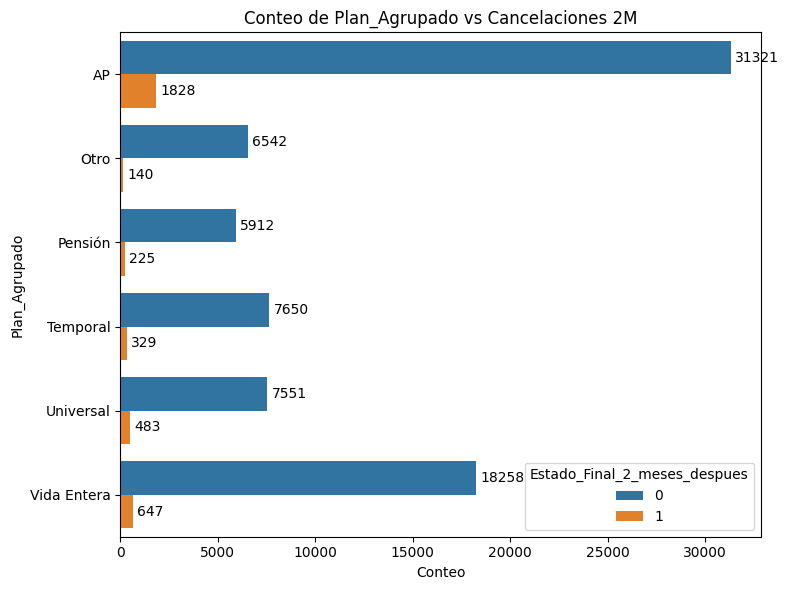

Estado_Final_2_meses_despues      0     1  Total Plan_Agrupado   Ratio %
Plan_Agrupado                                                           
AP                            31321  1828                33149  5.514495
Otro                           6542   140                 6682  2.095181
Pensión                        5912   225                 6137  3.666286
Temporal                       7650   329                 7979  4.123324
Universal                      7551   483                 8034  6.011949
Vida Entera                   18258   647                18905  3.422375
Total Plan_Agrupado           77234  3652                80886  4.514996


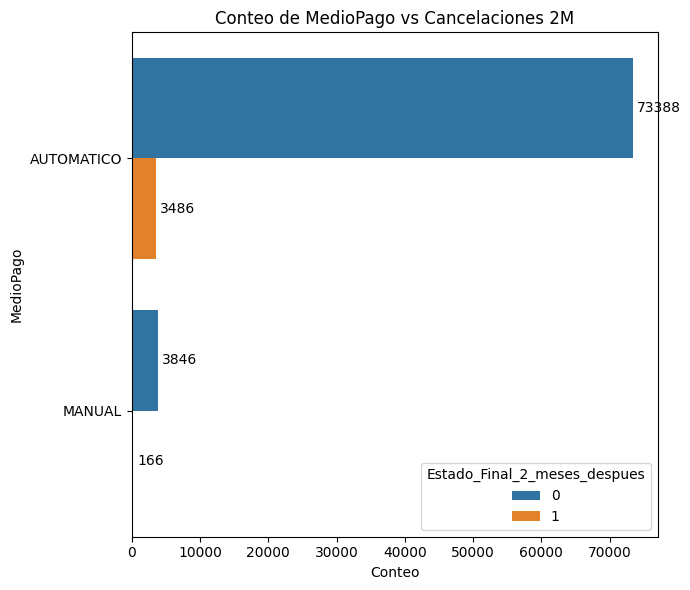

Estado_Final_2_meses_despues      0     1  Total MedioPago   Ratio %
MedioPago                                                           
AUTOMATICO                    73388  3486            76874  4.534693
MANUAL                         3846   166             4012  4.137587
Total MedioPago               77234  3652            80886  4.514996


In [69]:
# Grafica de antiguedad de Pólizas en meses
plt.figure(figsize=(10, 6))
sns.histplot(df['Ant_pol'], bins=30, kde=True)
plt.title('Distribución de Antiguedad Póliza')
plt.xlabel('Meses Ant Póliza')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()




# Grafica de barras entre Categopria de Mora y Estado despues de 2 meses
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='Categoria_Mora', hue='Estado_Final_2_meses_despues', data=df, order=sorted(df['Categoria_Mora'].unique()))
plt.title('Conteo de Categoria_Mora vs Cancelaciones 2M')
plt.xlabel('Conteo')
plt.ylabel('Categoria_Mora')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.tight_layout()
plt.show()

# tabla de contingencia  entre Categopria de Mora y Estado despues de 2 meses y % de cancelaciones
# Create the contingency table
contingency_table = pd.crosstab(df['Categoria_Mora'], df['Estado_Final_2_meses_despues'], margins=True, margins_name="Total Categoria_Mora")
contingency_table['Ratio %'] = contingency_table[1] / contingency_table['Total Categoria_Mora']*100
print (contingency_table)


# Grafica de barras entre Plan Agrupado y Estado despues de 2 meses
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='Plan_Agrupado', hue='Estado_Final_2_meses_despues', data=df, order=sorted(df['Plan_Agrupado'].unique()))
plt.title('Conteo de Plan_Agrupado vs Cancelaciones 2M')
plt.xlabel('Conteo')
plt.ylabel('Plan_Agrupado')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.tight_layout()
plt.show()

# tabla de contingencia
contingency_table = pd.crosstab(df['Plan_Agrupado'], df['Estado_Final_2_meses_despues'], margins=True, margins_name="Total Plan_Agrupado")
contingency_table['Ratio %'] = contingency_table[1] / contingency_table['Total Plan_Agrupado']*100
print (contingency_table)


# tabla de contingencia  entre Medio de PAgo y Estado despues de 2 meses y % de cancelaciones

plt.figure(figsize=(7, 6))
ax = sns.countplot(y='MedioPago', hue='Estado_Final_2_meses_despues', data=df, order=sorted(df['MedioPago'].unique()))
plt.title('Conteo de MedioPago vs Cancelaciones 2M')
plt.xlabel('Conteo')
plt.ylabel('MedioPago')

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.tight_layout()
plt.show()
# tabla de contingencia
contingency_table = pd.crosstab(df['MedioPago'], df['Estado_Final_2_meses_despues'], margins=True, margins_name="Total MedioPago")
contingency_table['Ratio %'] = contingency_table[1] / contingency_table['Total MedioPago']*100
print (contingency_table)



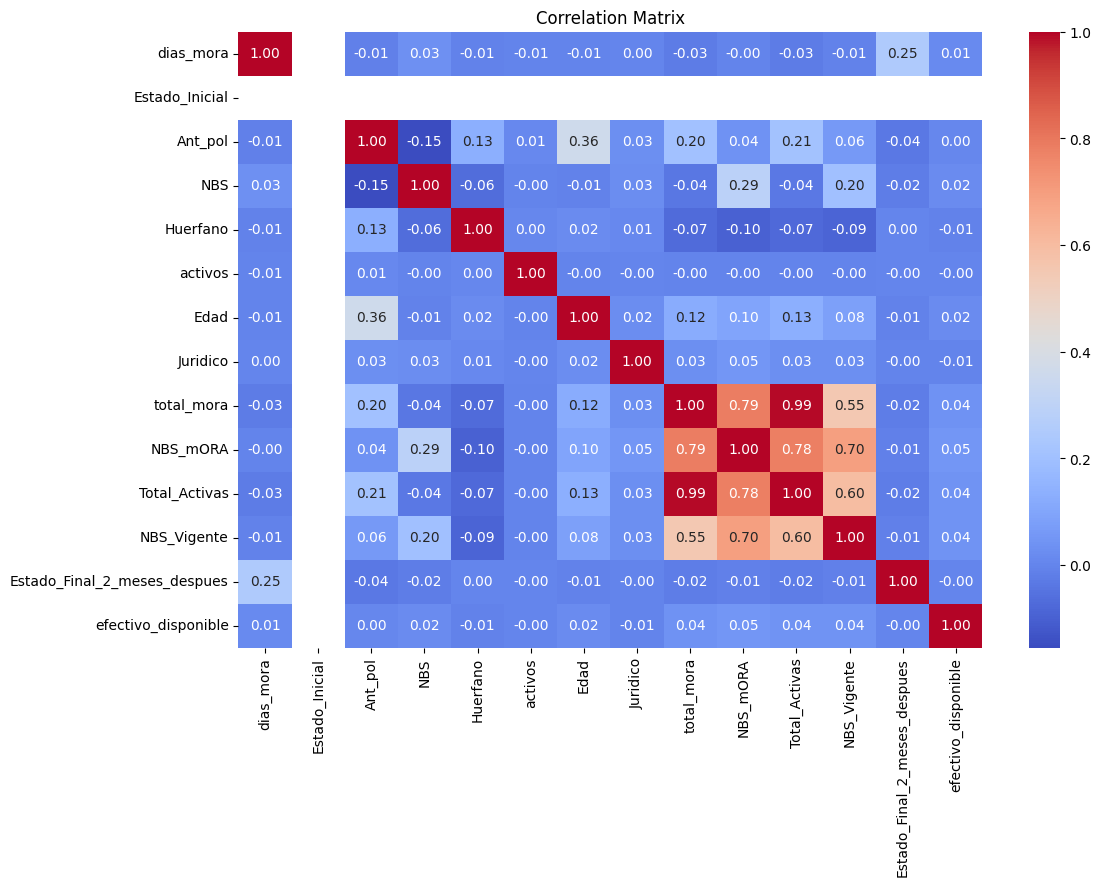

In [70]:
df_numeric = df.select_dtypes(include=['number'])


# Correlation matrix for numerical features (if applicable)
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
